# Importing Required Modules and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
dataset = pd.read_csv('dataset_insurance.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
dataset.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [8]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
dataset['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

# Data Visualization

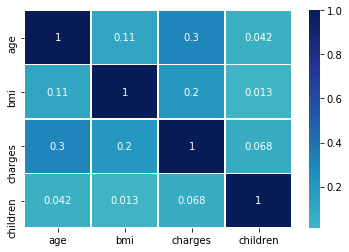

In [11]:
corrs = dataset[['age', 'bmi', 'charges', 'children']].corr()
sns.heatmap(corrs, linewidths = 0.5, annot=True, center=0, cmap="YlGnBu")

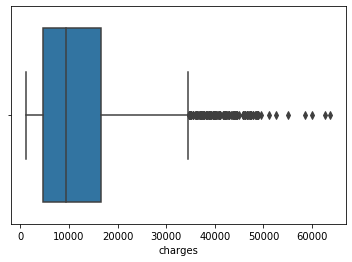

In [12]:
sns.boxplot(dataset['charges'])

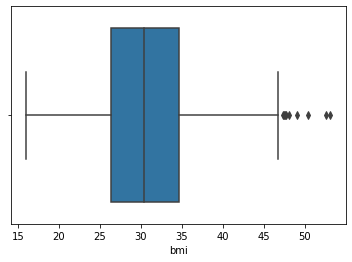

In [13]:
sns.boxplot(dataset['bmi'])

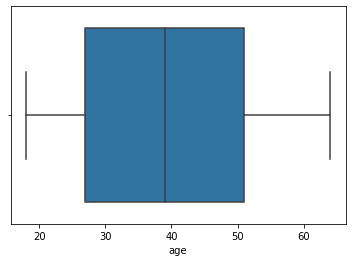

In [14]:
sns.boxplot(dataset['age'])

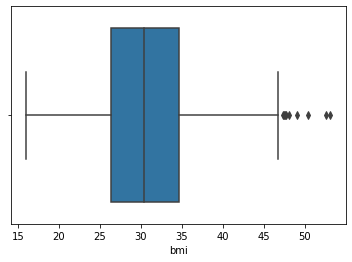

In [15]:
sns.boxplot(dataset['bmi'])

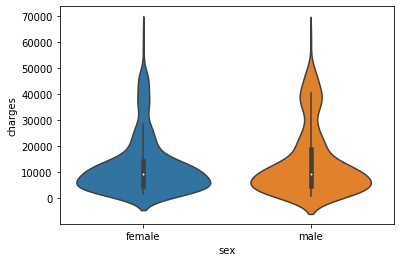

In [16]:
sns.violinplot(x='sex',y='charges',data=dataset)

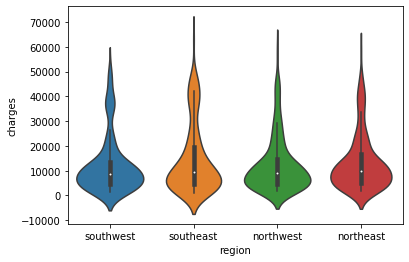

In [17]:
sns.violinplot(x='region',y='charges',data=dataset)

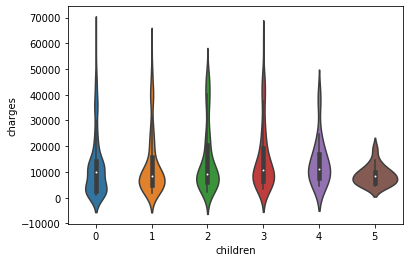

In [18]:
sns.violinplot(x='children',y='charges',data=dataset)

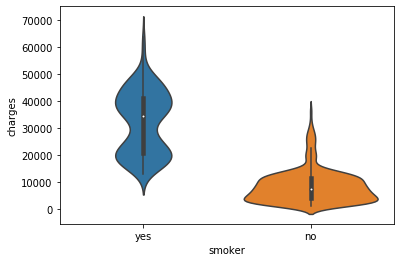

In [19]:
sns.violinplot(x='smoker',y='charges',data=dataset)

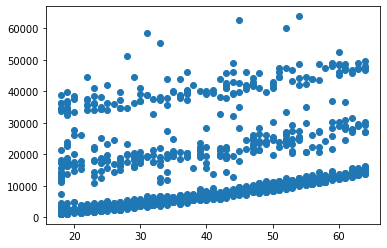

In [20]:
plt.scatter(dataset['age'],dataset['charges'])

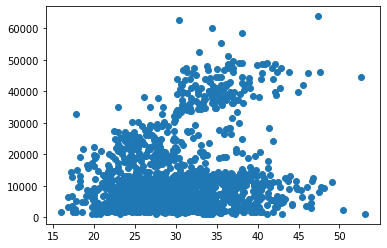

In [21]:
plt.scatter(dataset['bmi'],dataset['charges'])

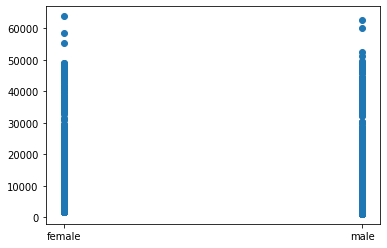

In [22]:
plt.scatter(dataset['sex'],dataset['charges'])

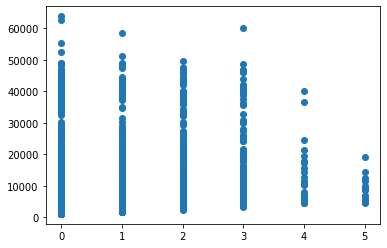

In [23]:
plt.scatter(dataset['children'],dataset['charges'])

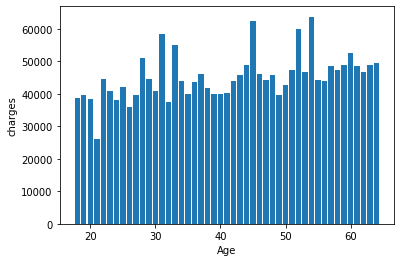

In [24]:
plt.bar(dataset['age'],dataset['charges'])
plt.xlabel("Age")
plt.ylabel("charges")
plt.show()

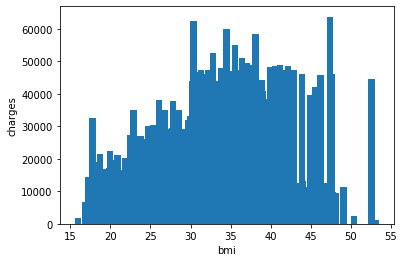

In [25]:
plt.bar(dataset['bmi'],dataset['charges'])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

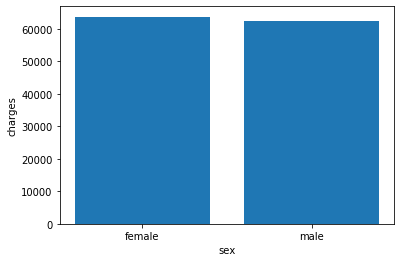

In [26]:
plt.bar(dataset['sex'],dataset['charges'])
plt.xlabel("sex")
plt.ylabel("charges")
plt.show()

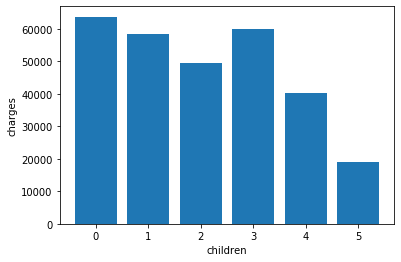

In [27]:
plt.bar(dataset['children'],dataset['charges'])
plt.xlabel("children")
plt.ylabel("charges")
plt.show()

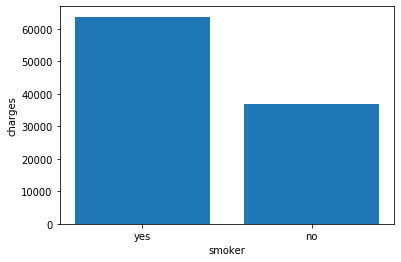

In [28]:
plt.bar(dataset['smoker'],dataset['charges'])
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()

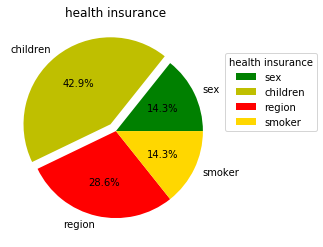

In [29]:
z=[2,6,4,2]
label=["sex","children",'region','smoker']
colors=['g','y','r','gold']
plt.pie(z,labels=label,explode=[0,0.1,0,0],colors=colors,autopct='%1.1f%%')
plt.title("health insurance")
plt.legend(title="health insurance",loc=(1.0,0.5))
plt.show()

<BarContainer object of 4 artists>

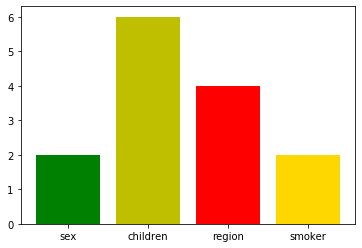

In [30]:
plt.bar(label,z,color=('g','y','r','gold'))

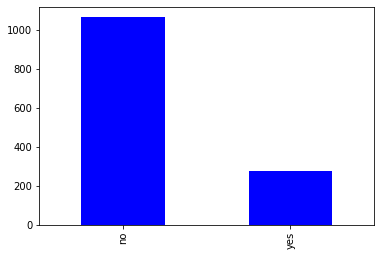

In [31]:
# Visualizing the frequency of the smoker category:
counts = dataset['smoker'].value_counts() 
counts.plot.bar(color = 'blue', grid=False) 

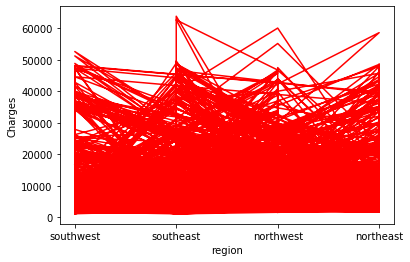

In [32]:
plt.plot(dataset['region'],dataset['charges'],'r')
plt.xlabel('region')
plt.ylabel('Charges')
plt.show()

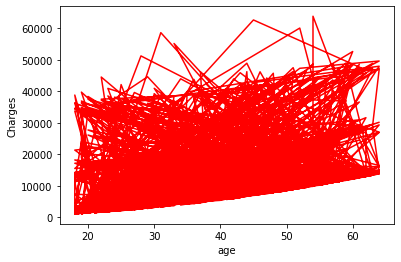

In [33]:
plt.plot(dataset['age'],dataset['charges'],'r')
plt.xlabel('age')
plt.ylabel('Charges')
plt.show()

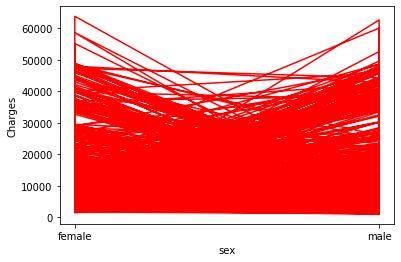

In [34]:
plt.plot(dataset['sex'],dataset['charges'],'r')
plt.xlabel('sex')
plt.ylabel('Charges')
plt.show()

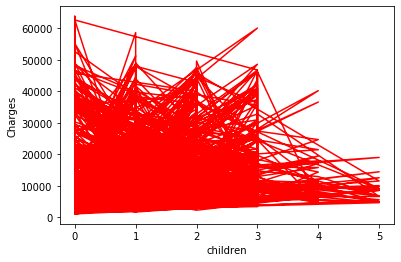

In [35]:
plt.plot(dataset['children'],dataset['charges'],'r')
plt.xlabel('children')
plt.ylabel('Charges')
plt.show()

Text(0.5, 1.0, 'small graph')

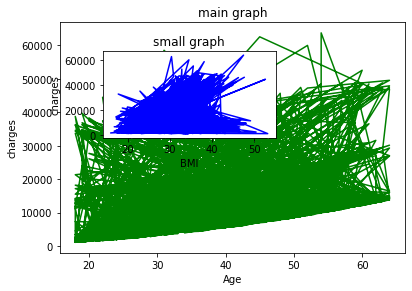

In [36]:
fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8])#main axes left,bottom,width,height
axes2=fig.add_axes([0.2,0.5,0.4,0.3])
axes1.plot(dataset['age'],dataset['charges'],'g')
axes1.set_xlabel('Age')
axes1.set_ylabel('charges')
axes1.set_title('main graph')
axes2.plot(dataset['bmi'],dataset['charges'],'b')
axes2.set_xlabel('BMI')
axes2.set_ylabel('charges')
axes2.set_title("small graph")

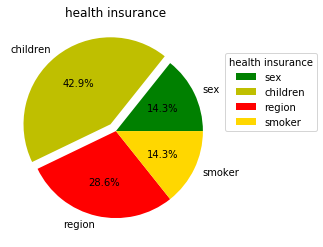

In [37]:
z=[2,6,4,2]
label=["sex","children",'region','smoker']
colors=['g','y','r','gold']
plt.pie(z,labels=label,explode=[0,0.1,0,0],colors=colors,autopct='%1.1f%%')
plt.title("health insurance")
plt.legend(title="health insurance",loc=(1.0,0.5))
plt.show()

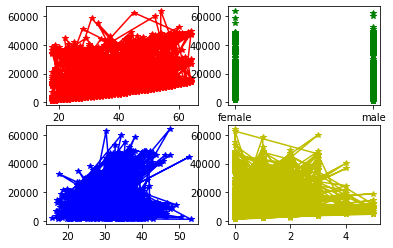

In [38]:
plt.subplot(2,2,1)
plt.plot(dataset['age'],dataset['charges'],'r',marker='*')
plt.subplot(2,2,2)
plt.plot(dataset['sex'],dataset['charges'],'g*')
plt.subplot(2,2,3)
plt.plot(dataset["bmi"],dataset['charges'],'b*-')
plt.subplot(2,2,4)
plt.plot(dataset['children'],dataset['charges'],'y*-')
plt.show()

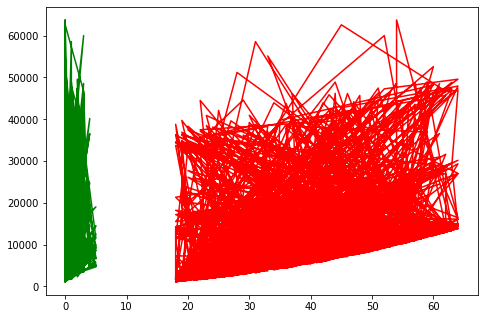

In [39]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])#main axes left,bottom,width,height
axes.plot(dataset['age'],dataset['charges'],'r')
axes.plot(dataset['children'],dataset['charges'],'g')

# Data Preprocessing

In [40]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
lb = LabelEncoder()
dataset.iloc[:,1] = lb.fit_transform(dataset.iloc[:,1])
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [42]:
dataset.iloc[:,4] = lb.fit_transform(dataset.iloc[:,4])
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [43]:
x = dataset.iloc[:,:6]
y = dataset.iloc[:,-1].values
ct = ColumnTransformer([('on',OneHotEncoder(),[5])],remainder='passthrough')
x = ct.fit_transform(x)
x = x[:,1:]

In [44]:
joblib.dump(ct, 'transf')

['transf']

In [45]:
sc = StandardScaler()
dataset.iloc[:,5] = lb.fit_transform(dataset.iloc[:,5])
z=np.abs(stats.zscore(dataset))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.97058663, 1.34390459,
        0.2985838 ],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.5074631 , 0.43849455,
        0.95368917],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.5074631 , 0.43849455,
        0.72867467],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.5074631 , 0.43849455,
        0.96159623],
       [1.29636188, 1.0105187 , 0.79781341, ..., 0.5074631 , 1.34390459,
        0.93036151],
       [1.55168573, 1.0105187 , 0.26138796, ..., 1.97058663, 0.46691549,
        1.31105347]])

In [46]:
threshold=3
np.where(z>threshold)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [47]:
z[1317][6]

1.000121811689711

In [48]:
dataset=dataset[(z<=3).all(axis=1)]
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [49]:
Q1=dataset.quantile(0.25)
Q1

age           27.0000
sex            0.0000
bmi           26.3150
children       0.0000
smoker         0.0000
region         1.0000
charges     4686.3887
Name: 0.25, dtype: float64

In [50]:
Q3=dataset.quantile(0.75)
Q3

age            51.0000
sex             1.0000
bmi            34.5800
children        2.0000
smoker          0.0000
region          2.0000
charges     16577.7795
Name: 0.75, dtype: float64

In [51]:
IQR=Q3-Q1
IQR

age            24.0000
sex             1.0000
bmi             8.2650
children        2.0000
smoker          0.0000
region          1.0000
charges     11891.3908
dtype: float64

In [52]:
boston_iqr_outlier=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
boston_iqr_outlier

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


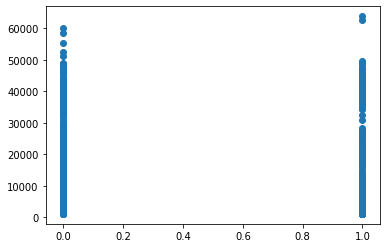

In [53]:
plt.scatter(x[:,1],y)

In [54]:
mn = MinMaxScaler()
x = mn.fit_transform(x)
x

array([[0.        , 0.        , 1.        , ..., 0.3212268 , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.47914985, 0.2       ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.45843422, 0.6       ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.56201238, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.26472962, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.35270379, 0.        ,
        1.        ]])

In [55]:
x[0]

array([0.        , 0.        , 1.        , 0.02173913, 0.        ,
       0.3212268 , 0.        , 1.        ])

# Training and Testing the Data and Model Evaluation

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
x_train.shape

(1070, 8)

In [58]:
x_test.shape

(268, 8)

In [59]:
y_train.shape

(1070,)

In [60]:
y_test.shape

(268,)

In [61]:
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = mr.predict(x_test)
y_pred

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [63]:
y_pred.shape

(268,)

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7999876970680433

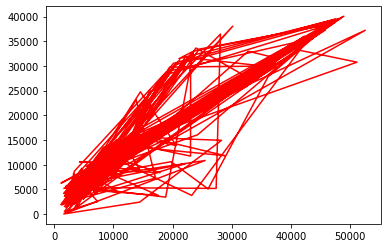

In [65]:
plt.plot(y_test,y_pred,'r')
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

5641.62655885019

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [68]:
y_pred = dt.predict(x_test)

In [69]:
y_pred

array([12786.94326301,  9219.59177795, 45262.55810804, 15331.9419564 ,
       10805.93703161,  7136.32098617,  2874.70660944, 10805.93703161,
        7136.32098617,  5484.77212765,  7136.32098617, 10805.93703161,
       10805.93703161,  7136.32098617, 17670.56383   ,  9219.59177795,
       15331.9419564 ,  5484.77212765,  7136.32098617, 36429.01656229,
       23452.5698288 , 12786.94326301, 12786.94326301, 27697.80077211,
        2874.70660944,  5484.77212765,  5484.77212765,  7136.32098617,
        5484.77212765, 10805.93703161,  7136.32098617, 45262.55810804,
       15331.9419564 , 12786.94326301, 17670.56383   ,  5484.77212765,
        9219.59177795, 36429.01656229, 40980.46124793,  2874.70660944,
        7136.32098617,  5484.77212765, 20130.86533913, 45262.55810804,
       36429.01656229,  5827.62552429,  9219.59177795,  7136.32098617,
        5484.77212765, 12786.94326301,  5484.77212765,  5827.62552429,
       27697.80077211, 45262.55810804, 12786.94326301,  5484.77212765,
      

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8802320313936407

In [71]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

4365.623933841241

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=20,random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [73]:
joblib.dump(rf,'model.save')

['model.save']

In [74]:
y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8768016692858707

C:\Users\mpkri\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


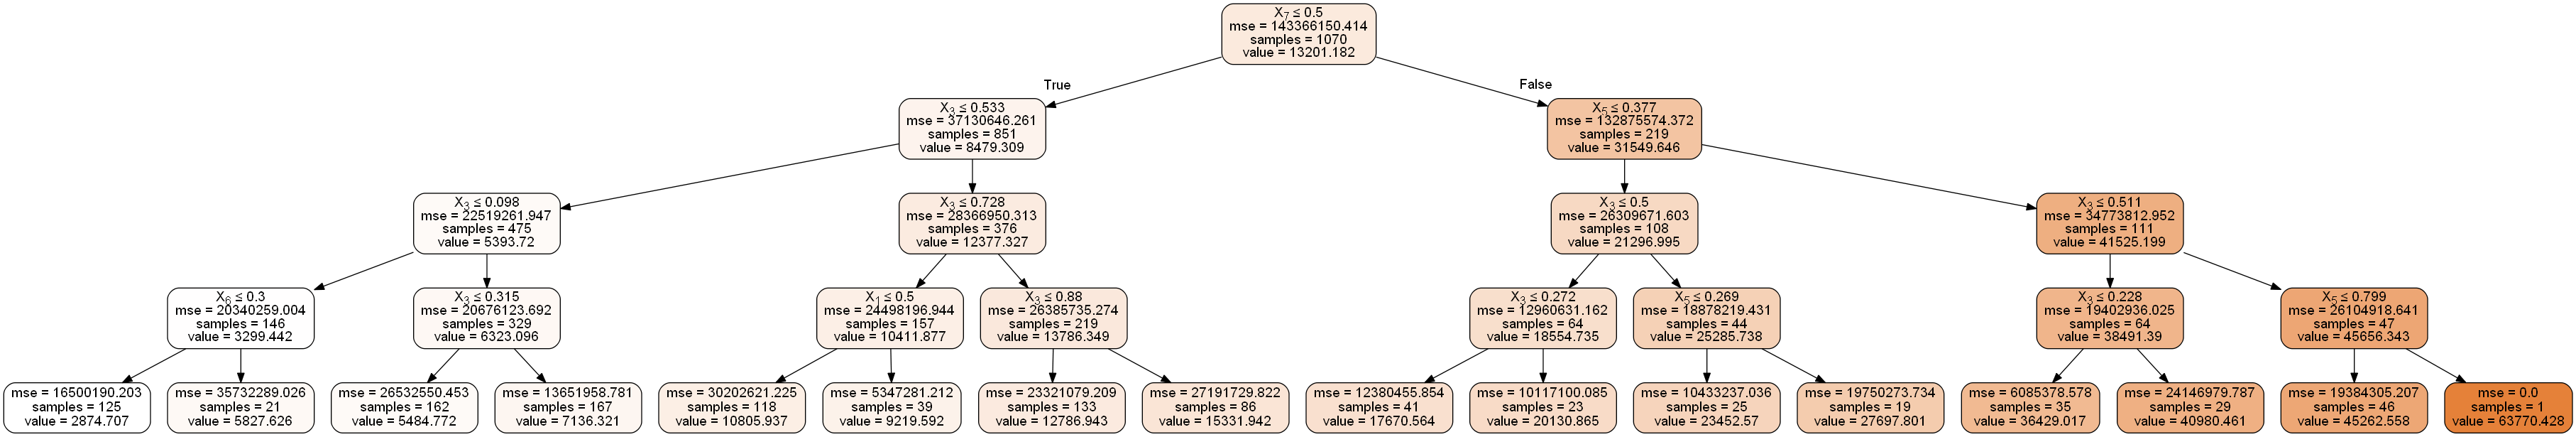

In [75]:
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [76]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

4427.702081744906

In [77]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [78]:
model=Sequential()

In [79]:
model.add(Dense(input_dim=8,kernel_initializer='normal',units=30,activation='relu'))

In [80]:
model.add(Dense(kernel_initializer='normal',units=25,activation='relu'))

In [81]:
model.add(Dense(kernel_initializer='normal',units=15,activation='relu'))

In [82]:
model.add(Dense(kernel_initializer='normal',units=1,activation='linear'))

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [85]:
model.fit(x_train,y_train,epochs=3000, batch_size=32)

Train on 1070 samples
Epoch 1/3000
1070/1070 [==============================] - 2s 2ms/sample - loss: 13201.1388 - mean_absolute_error: 13201.1387
Epoch 2/3000
1070/1070 [==============================] - 0s 110us/sample - loss: 13200.5871 - mean_absolute_error: 13200.5850
Epoch 3/3000
1070/1070 [==============================] - 0s 114us/sample - loss: 13196.1116 - mean_absolute_error: 13196.1113
Epoch 4/3000
1070/1070 [==============================] - 0s 127us/sample - loss: 13176.1454 - mean_absolute_error: 13176.1436
Epoch 5/3000
1070/1070 [==============================] - 0s 128us/sample - loss: 13115.9699 - mean_absolute_error: 13115.9688
Epoch 6/3000
1070/1070 [==============================] - 0s 122us/sample - loss: 12976.0867 - mean_absolute_error: 12976.0850
Epoch 7/3000
1070/1070 [==============================] - 0s 119us/sample - loss: 12701.5468 - mean_absolute_error: 12701.5459
Epoch 8/3000
1070/1070 [==============================] - 0s 100us/sample - loss: 12223.768

1070/1070 [==============================] - 0s 83us/sample - loss: 3568.1054 - mean_absolute_error: 3568.1050
Epoch 67/3000
1070/1070 [==============================] - 0s 99us/sample - loss: 3560.2987 - mean_absolute_error: 3560.2986
Epoch 68/3000
1070/1070 [==============================] - 0s 84us/sample - loss: 3554.2709 - mean_absolute_error: 3554.2710
Epoch 69/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 3549.4763 - mean_absolute_error: 3549.4763
Epoch 70/3000
1070/1070 [==============================] - 0s 85us/sample - loss: 3545.3225 - mean_absolute_error: 3545.3225
Epoch 71/3000
1070/1070 [==============================] - 0s 82us/sample - loss: 3539.9640 - mean_absolute_error: 3539.9641
Epoch 72/3000
1070/1070 [==============================] - 0s 80us/sample - loss: 3535.2802 - mean_absolute_error: 3535.2798
Epoch 73/3000
1070/1070 [==============================] - 0s 78us/sample - loss: 3532.7178 - mean_absolute_error: 3532.7173
Epoch 74/3000


1070/1070 [==============================] - 0s 87us/sample - loss: 3271.7155 - mean_absolute_error: 3271.7151
Epoch 132/3000
1070/1070 [==============================] - 0s 105us/sample - loss: 3271.2898 - mean_absolute_error: 3271.2900
Epoch 133/3000
1070/1070 [==============================] - 0s 92us/sample - loss: 3269.1025 - mean_absolute_error: 3269.1025
Epoch 134/3000
1070/1070 [==============================] - 0s 97us/sample - loss: 3265.3729 - mean_absolute_error: 3265.3723
Epoch 135/3000
1070/1070 [==============================] - 0s 87us/sample - loss: 3264.1932 - mean_absolute_error: 3264.1931
Epoch 136/3000
1070/1070 [==============================] - 0s 84us/sample - loss: 3265.8762 - mean_absolute_error: 3265.8760
Epoch 137/3000
1070/1070 [==============================] - 0s 109us/sample - loss: 3265.7489 - mean_absolute_error: 3265.7493
Epoch 138/3000
1070/1070 [==============================] - 0s 89us/sample - loss: 3262.0215 - mean_absolute_error: 3262.0215
Epoch

1070/1070 [==============================] - 0s 81us/sample - loss: 3215.8825 - mean_absolute_error: 3215.8828
Epoch 196/3000
1070/1070 [==============================] - 0s 113us/sample - loss: 3215.1819 - mean_absolute_error: 3215.1821s - loss: 3364.1301 - mean_absolute_error: 3364.13
Epoch 197/3000
1070/1070 [==============================] - 0s 81us/sample - loss: 3214.9243 - mean_absolute_error: 3214.9246
Epoch 198/3000
1070/1070 [==============================] - 0s 79us/sample - loss: 3217.6933 - mean_absolute_error: 3217.6934
Epoch 199/3000
1070/1070 [==============================] - 0s 94us/sample - loss: 3214.8709 - mean_absolute_error: 3214.8708
Epoch 200/3000
1070/1070 [==============================] - 0s 86us/sample - loss: 3215.7980 - mean_absolute_error: 3215.7976
Epoch 201/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 3215.3189 - mean_absolute_error: 3215.3191
Epoch 202/3000
1070/1070 [==============================] - 0s 77us/sample - loss:

1070/1070 [==============================] - 0s 95us/sample - loss: 3202.6698 - mean_absolute_error: 3202.6707
Epoch 260/3000
1070/1070 [==============================] - 0s 81us/sample - loss: 3199.7992 - mean_absolute_error: 3199.7996
Epoch 261/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 3199.8934 - mean_absolute_error: 3199.8938
Epoch 262/3000
1070/1070 [==============================] - 0s 66us/sample - loss: 3200.2217 - mean_absolute_error: 3200.2217
Epoch 263/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 3200.5166 - mean_absolute_error: 3200.5161
Epoch 264/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 3203.1182 - mean_absolute_error: 3203.1179
Epoch 265/3000
1070/1070 [==============================] - 0s 65us/sample - loss: 3200.2946 - mean_absolute_error: 3200.2947
Epoch 266/3000
1070/1070 [==============================] - 0s 62us/sample - loss: 3200.5927 - mean_absolute_error: 3200.5928
Epoch 2

1070/1070 [==============================] - 0s 109us/sample - loss: 3183.2553 - mean_absolute_error: 3183.2556
Epoch 324/3000
1070/1070 [==============================] - 0s 120us/sample - loss: 3182.2456 - mean_absolute_error: 3182.2456
Epoch 325/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 3181.1281 - mean_absolute_error: 3181.1279
Epoch 326/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 3182.7909 - mean_absolute_error: 3182.7908
Epoch 327/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 3182.7423 - mean_absolute_error: 3182.7422
Epoch 328/3000
1070/1070 [==============================] - 0s 92us/sample - loss: 3180.3954 - mean_absolute_error: 3180.3955
Epoch 329/3000
1070/1070 [==============================] - 0s 94us/sample - loss: 3182.2180 - mean_absolute_error: 3182.2178
Epoch 330/3000
1070/1070 [==============================] - 0s 83us/sample - loss: 3181.7097 - mean_absolute_error: 3181.7095
Epoch

1070/1070 [==============================] - 0s 88us/sample - loss: 3146.3073 - mean_absolute_error: 3146.3071
Epoch 389/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 3145.5995 - mean_absolute_error: 3145.5996
Epoch 390/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 3145.8959 - mean_absolute_error: 3145.8965
Epoch 391/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 3142.7172 - mean_absolute_error: 3142.7166
Epoch 392/3000
1070/1070 [==============================] - 0s 82us/sample - loss: 3142.7501 - mean_absolute_error: 3142.7502
Epoch 393/3000
1070/1070 [==============================] - 0s 88us/sample - loss: 3144.0883 - mean_absolute_error: 3144.0884
Epoch 394/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 3140.3062 - mean_absolute_error: 3140.3062
Epoch 395/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 3139.7634 - mean_absolute_error: 3139.7632
Epoch 3

1070/1070 [==============================] - 0s 79us/sample - loss: 3082.9054 - mean_absolute_error: 3082.9055
Epoch 454/3000
1070/1070 [==============================] - 0s 100us/sample - loss: 3079.0925 - mean_absolute_error: 3079.0930
Epoch 455/3000
1070/1070 [==============================] - 0s 80us/sample - loss: 3077.8059 - mean_absolute_error: 3077.8069
Epoch 456/3000
1070/1070 [==============================] - 0s 80us/sample - loss: 3076.0530 - mean_absolute_error: 3076.0527
Epoch 457/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 3075.2008 - mean_absolute_error: 3075.2014
Epoch 458/3000
1070/1070 [==============================] - 0s 90us/sample - loss: 3075.0026 - mean_absolute_error: 3075.0027
Epoch 459/3000
1070/1070 [==============================] - 0s 94us/sample - loss: 3076.1316 - mean_absolute_error: 3076.1316
Epoch 460/3000
1070/1070 [==============================] - 0s 89us/sample - loss: 3072.6686 - mean_absolute_error: 3072.6689
Epoch 

1070/1070 [==============================] - 0s 83us/sample - loss: 2968.3032 - mean_absolute_error: 2968.3040
Epoch 519/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 2969.1884 - mean_absolute_error: 2969.1882
Epoch 520/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 2963.2362 - mean_absolute_error: 2963.2368
Epoch 521/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 2961.9895 - mean_absolute_error: 2961.9895
Epoch 522/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 2958.5303 - mean_absolute_error: 2958.5308
Epoch 523/3000
1070/1070 [==============================] - 0s 84us/sample - loss: 2957.4323 - mean_absolute_error: 2957.4321
Epoch 524/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 2959.0718 - mean_absolute_error: 2959.0715
Epoch 525/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 2953.9721 - mean_absolute_error: 2953.9724
Epoch 5

1070/1070 [==============================] - 0s 82us/sample - loss: 2791.0233 - mean_absolute_error: 2791.0234
Epoch 583/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 2784.7856 - mean_absolute_error: 2784.7854
Epoch 584/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 2786.7927 - mean_absolute_error: 2786.7922
Epoch 585/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 2783.5210 - mean_absolute_error: 2783.5212
Epoch 586/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 2777.2007 - mean_absolute_error: 2777.2004
Epoch 587/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 2772.5463 - mean_absolute_error: 2772.5464
Epoch 588/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 2769.2175 - mean_absolute_error: 2769.2170
Epoch 589/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 2765.2767 - mean_absolute_error: 2765.2769
Epoch 5

1070/1070 [==============================] - 0s 76us/sample - loss: 2542.8329 - mean_absolute_error: 2542.8325
Epoch 648/3000
1070/1070 [==============================] - 0s 94us/sample - loss: 2539.3482 - mean_absolute_error: 2539.3481
Epoch 649/3000
1070/1070 [==============================] - 0s 84us/sample - loss: 2534.9267 - mean_absolute_error: 2534.9268
Epoch 650/3000
1070/1070 [==============================] - 0s 88us/sample - loss: 2530.7651 - mean_absolute_error: 2530.7651
Epoch 651/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 2528.2484 - mean_absolute_error: 2528.2488
Epoch 652/3000
1070/1070 [==============================] - 0s 83us/sample - loss: 2524.5447 - mean_absolute_error: 2524.5449
Epoch 653/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 2524.2843 - mean_absolute_error: 2524.2842
Epoch 654/3000
1070/1070 [==============================] - 0s 85us/sample - loss: 2518.0263 - mean_absolute_error: 2518.0264
Epoch 6

1070/1070 [==============================] - 0s 84us/sample - loss: 2280.2342 - mean_absolute_error: 2280.2341
Epoch 713/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 2278.4999 - mean_absolute_error: 2278.5000
Epoch 714/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 2272.6023 - mean_absolute_error: 2272.6021
Epoch 715/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 2267.5808 - mean_absolute_error: 2267.5808
Epoch 716/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 2263.7463 - mean_absolute_error: 2263.7461
Epoch 717/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 2261.3152 - mean_absolute_error: 2261.3149
Epoch 718/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 2254.8576 - mean_absolute_error: 2254.8574
Epoch 719/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 2250.5191 - mean_absolute_error: 2250.5190
Epoch 7

1070/1070 [==============================] - 0s 68us/sample - loss: 2075.0557 - mean_absolute_error: 2075.0557
Epoch 778/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 2070.2654 - mean_absolute_error: 2070.2651
Epoch 779/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 2070.7229 - mean_absolute_error: 2070.7229
Epoch 780/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 2069.7246 - mean_absolute_error: 2069.7246
Epoch 781/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 2066.4890 - mean_absolute_error: 2066.4893
Epoch 782/3000
1070/1070 [==============================] - 0s 68us/sample - loss: 2064.0065 - mean_absolute_error: 2064.0066
Epoch 783/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 2061.5334 - mean_absolute_error: 2061.5334
Epoch 784/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 2060.2376 - mean_absolute_error: 2060.2378
Epoch 7

1070/1070 [==============================] - 0s 70us/sample - loss: 1996.5933 - mean_absolute_error: 1996.5933
Epoch 843/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1993.9689 - mean_absolute_error: 1993.9691
Epoch 844/3000
1070/1070 [==============================] - 0s 68us/sample - loss: 1993.0310 - mean_absolute_error: 1993.0311
Epoch 845/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1991.7313 - mean_absolute_error: 1991.7311
Epoch 846/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1990.6868 - mean_absolute_error: 1990.6866
Epoch 847/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1991.9483 - mean_absolute_error: 1991.9484
Epoch 848/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1996.0208 - mean_absolute_error: 1996.0204
Epoch 849/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1991.2631 - mean_absolute_error: 1991.2628
Epoch 8

1070/1070 [==============================] - 0s 68us/sample - loss: 1963.7452 - mean_absolute_error: 1963.7449
Epoch 908/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1963.3265 - mean_absolute_error: 1963.3267
Epoch 909/3000
1070/1070 [==============================] - 0s 68us/sample - loss: 1966.6232 - mean_absolute_error: 1966.6229
Epoch 910/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1964.4231 - mean_absolute_error: 1964.4231
Epoch 911/3000
1070/1070 [==============================] - 0s 68us/sample - loss: 1964.9697 - mean_absolute_error: 1964.9696
Epoch 912/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1961.3115 - mean_absolute_error: 1961.3114
Epoch 913/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1961.5043 - mean_absolute_error: 1961.5040
Epoch 914/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1962.7514 - mean_absolute_error: 1962.7512
Epoch 9

1070/1070 [==============================] - 0s 71us/sample - loss: 1947.7125 - mean_absolute_error: 1947.7124
Epoch 973/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1949.2207 - mean_absolute_error: 1949.2208
Epoch 974/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1948.3983 - mean_absolute_error: 1948.3981
Epoch 975/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1949.0499 - mean_absolute_error: 1949.0499
Epoch 976/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1948.5063 - mean_absolute_error: 1948.5063
Epoch 977/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1947.6870 - mean_absolute_error: 1947.6869
Epoch 978/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1947.5337 - mean_absolute_error: 1947.5337
Epoch 979/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1946.8695 - mean_absolute_error: 1946.8696
Epoch 9

1070/1070 [==============================] - 0s 71us/sample - loss: 1939.1968 - mean_absolute_error: 1939.1970
Epoch 1037/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1941.7866 - mean_absolute_error: 1941.7866
Epoch 1038/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1939.8518 - mean_absolute_error: 1939.8518
Epoch 1039/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1938.7599 - mean_absolute_error: 1938.7599
Epoch 1040/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1938.3609 - mean_absolute_error: 1938.3610
Epoch 1041/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1937.9286 - mean_absolute_error: 1937.9285
Epoch 1042/3000
1070/1070 [==============================] - 0s 79us/sample - loss: 1937.4485 - mean_absolute_error: 1937.4484
Epoch 1043/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1936.6848 - mean_absolute_error: 1936.6849


1070/1070 [==============================] - 0s 72us/sample - loss: 1928.9320 - mean_absolute_error: 1928.9318
Epoch 1101/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1928.2171 - mean_absolute_error: 1928.2173
Epoch 1102/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1930.1208 - mean_absolute_error: 1930.1211
Epoch 1103/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1928.8812 - mean_absolute_error: 1928.8811
Epoch 1104/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1928.0919 - mean_absolute_error: 1928.0918
Epoch 1105/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1927.4491 - mean_absolute_error: 1927.4491
Epoch 1106/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1927.0886 - mean_absolute_error: 1927.0885
Epoch 1107/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1926.7073 - mean_absolute_error: 1926.7073


1070/1070 [==============================] - 0s 82us/sample - loss: 1920.6450 - mean_absolute_error: 1920.6453
Epoch 1165/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 1921.1593 - mean_absolute_error: 1921.1592
Epoch 1166/3000
1070/1070 [==============================] - 0s 80us/sample - loss: 1925.7994 - mean_absolute_error: 1925.7994
Epoch 1167/3000
1070/1070 [==============================] - 0s 85us/sample - loss: 1919.0668 - mean_absolute_error: 1919.0668
Epoch 1168/3000
1070/1070 [==============================] - 0s 84us/sample - loss: 1922.3576 - mean_absolute_error: 1922.3575
Epoch 1169/3000
1070/1070 [==============================] - 0s 79us/sample - loss: 1922.1022 - mean_absolute_error: 1922.1019
Epoch 1170/3000
1070/1070 [==============================] - 0s 95us/sample - loss: 1920.3644 - mean_absolute_error: 1920.3645
Epoch 1171/3000
1070/1070 [==============================] - 0s 98us/sample - loss: 1920.7532 - mean_absolute_error: 1920.7528


1070/1070 [==============================] - 0s 67us/sample - loss: 1911.4024 - mean_absolute_error: 1911.4026
Epoch 1229/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1910.3938 - mean_absolute_error: 1910.3937
Epoch 1230/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1914.0868 - mean_absolute_error: 1914.0869
Epoch 1231/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1910.4764 - mean_absolute_error: 1910.4763
Epoch 1232/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1912.7544 - mean_absolute_error: 1912.7546
Epoch 1233/3000
1070/1070 [==============================] - 0s 68us/sample - loss: 1911.1640 - mean_absolute_error: 1911.1642
Epoch 1234/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1911.5115 - mean_absolute_error: 1911.5116
Epoch 1235/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1910.1436 - mean_absolute_error: 1910.1436


1070/1070 [==============================] - 0s 73us/sample - loss: 1904.2410 - mean_absolute_error: 1904.2410
Epoch 1293/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1907.0642 - mean_absolute_error: 1907.0638
Epoch 1294/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1903.4938 - mean_absolute_error: 1903.4940
Epoch 1295/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1902.6652 - mean_absolute_error: 1902.6652
Epoch 1296/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1903.9584 - mean_absolute_error: 1903.9584
Epoch 1297/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1903.1349 - mean_absolute_error: 1903.1348
Epoch 1298/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1901.8789 - mean_absolute_error: 1901.8789
Epoch 1299/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1903.3690 - mean_absolute_error: 1903.3691


1070/1070 [==============================] - 0s 77us/sample - loss: 1896.7470 - mean_absolute_error: 1896.7471
Epoch 1357/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1895.2510 - mean_absolute_error: 1895.2510
Epoch 1358/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1898.8006 - mean_absolute_error: 1898.8007
Epoch 1359/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1893.4312 - mean_absolute_error: 1893.4312
Epoch 1360/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1900.8913 - mean_absolute_error: 1900.8912
Epoch 1361/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1896.5535 - mean_absolute_error: 1896.5533
Epoch 1362/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1896.6262 - mean_absolute_error: 1896.6262
Epoch 1363/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1893.5635 - mean_absolute_error: 1893.5638


1070/1070 [==============================] - 0s 74us/sample - loss: 1887.8296 - mean_absolute_error: 1887.8298
Epoch 1421/3000
1070/1070 [==============================] - 0s 79us/sample - loss: 1886.6627 - mean_absolute_error: 1886.6631
Epoch 1422/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1890.1496 - mean_absolute_error: 1890.1499
Epoch 1423/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1887.6447 - mean_absolute_error: 1887.6447
Epoch 1424/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1885.1409 - mean_absolute_error: 1885.1409
Epoch 1425/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1884.4868 - mean_absolute_error: 1884.4869
Epoch 1426/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1885.2991 - mean_absolute_error: 1885.2994
Epoch 1427/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1886.2746 - mean_absolute_error: 1886.2744


1070/1070 [==============================] - 0s 69us/sample - loss: 1877.9437 - mean_absolute_error: 1877.9438
Epoch 1485/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 1881.5263 - mean_absolute_error: 1881.5265
Epoch 1486/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1877.5642 - mean_absolute_error: 1877.5641
Epoch 1487/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1877.0648 - mean_absolute_error: 1877.0648
Epoch 1488/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1877.2835 - mean_absolute_error: 1877.2834
Epoch 1489/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1878.5249 - mean_absolute_error: 1878.5249
Epoch 1490/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1877.9545 - mean_absolute_error: 1877.9546
Epoch 1491/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1877.9834 - mean_absolute_error: 1877.9835


1070/1070 [==============================] - 0s 72us/sample - loss: 1868.0565 - mean_absolute_error: 1868.0565
Epoch 1549/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1867.1155 - mean_absolute_error: 1867.1155
Epoch 1550/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1869.9410 - mean_absolute_error: 1869.9409
Epoch 1551/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1868.4180 - mean_absolute_error: 1868.4182
Epoch 1552/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 1866.2398 - mean_absolute_error: 1866.2396
Epoch 1553/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1866.1213 - mean_absolute_error: 1866.1213
Epoch 1554/3000
1070/1070 [==============================] - 0s 67us/sample - loss: 1865.7746 - mean_absolute_error: 1865.7748
Epoch 1555/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1868.1659 - mean_absolute_error: 1868.1660


1070/1070 [==============================] - 0s 70us/sample - loss: 1853.9635 - mean_absolute_error: 1853.9634
Epoch 1613/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1854.5692 - mean_absolute_error: 1854.5693
Epoch 1614/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1856.0403 - mean_absolute_error: 1856.0403
Epoch 1615/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1853.6184 - mean_absolute_error: 1853.6187
Epoch 1616/3000
1070/1070 [==============================] - 0s 89us/sample - loss: 1854.5176 - mean_absolute_error: 1854.5175
Epoch 1617/3000
1070/1070 [==============================] - 0s 106us/sample - loss: 1854.6063 - mean_absolute_error: 1854.6063
Epoch 1618/3000
1070/1070 [==============================] - 0s 110us/sample - loss: 1853.9458 - mean_absolute_error: 1853.9458
Epoch 1619/3000
1070/1070 [==============================] - 0s 121us/sample - loss: 1853.3597 - mean_absolute_error: 1853.35

1070/1070 [==============================] - 0s 80us/sample - loss: 1841.5413 - mean_absolute_error: 1841.5413
Epoch 1677/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1840.1709 - mean_absolute_error: 1840.1709
Epoch 1678/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1846.1721 - mean_absolute_error: 1846.1722
Epoch 1679/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1843.7569 - mean_absolute_error: 1843.7568
Epoch 1680/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1840.1239 - mean_absolute_error: 1840.1237
Epoch 1681/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1838.8551 - mean_absolute_error: 1838.8550
Epoch 1682/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1843.0777 - mean_absolute_error: 1843.0776
Epoch 1683/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1842.0230 - mean_absolute_error: 1842.0231


1070/1070 [==============================] - 0s 76us/sample - loss: 1826.1796 - mean_absolute_error: 1826.1797
Epoch 1741/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1824.5270 - mean_absolute_error: 1824.5267
Epoch 1742/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1827.0579 - mean_absolute_error: 1827.0579
Epoch 1743/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1826.1202 - mean_absolute_error: 1826.1202
Epoch 1744/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1824.9534 - mean_absolute_error: 1824.9539
Epoch 1745/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1827.5368 - mean_absolute_error: 1827.5369
Epoch 1746/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1824.5939 - mean_absolute_error: 1824.5940
Epoch 1747/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1822.2382 - mean_absolute_error: 1822.2380


1070/1070 [==============================] - 0s 73us/sample - loss: 1805.2301 - mean_absolute_error: 1805.2299
Epoch 1805/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1811.2786 - mean_absolute_error: 1811.2786
Epoch 1806/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1808.0353 - mean_absolute_error: 1808.0355
Epoch 1807/3000
1070/1070 [==============================] - ETA: 0s - loss: 1844.0641 - mean_absolute_error: 1844.064 - 0s 72us/sample - loss: 1807.2021 - mean_absolute_error: 1807.2020
Epoch 1808/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1810.5869 - mean_absolute_error: 1810.5870
Epoch 1809/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1804.4522 - mean_absolute_error: 1804.4521
Epoch 1810/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1804.0946 - mean_absolute_error: 1804.0945
Epoch 1811/3000
1070/1070 [==============================] - 0s 73u

1070/1070 [==============================] - 0s 75us/sample - loss: 1784.3926 - mean_absolute_error: 1784.3927
Epoch 1869/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1783.7112 - mean_absolute_error: 1783.7111
Epoch 1870/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1785.4671 - mean_absolute_error: 1785.4673
Epoch 1871/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1785.3022 - mean_absolute_error: 1785.3020
Epoch 1872/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1782.2324 - mean_absolute_error: 1782.2324
Epoch 1873/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1784.2498 - mean_absolute_error: 1784.2496
Epoch 1874/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1782.0308 - mean_absolute_error: 1782.0306
Epoch 1875/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1781.3450 - mean_absolute_error: 1781.3451


1070/1070 [==============================] - 0s 76us/sample - loss: 1759.2240 - mean_absolute_error: 1759.2242
Epoch 1933/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1760.0817 - mean_absolute_error: 1760.0818
Epoch 1934/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1759.2761 - mean_absolute_error: 1759.2760
Epoch 1935/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1758.7251 - mean_absolute_error: 1758.7250
Epoch 1936/3000
1070/1070 [==============================] - 0s 67us/sample - loss: 1760.3969 - mean_absolute_error: 1760.3966
Epoch 1937/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1758.3814 - mean_absolute_error: 1758.3811
Epoch 1938/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1754.4026 - mean_absolute_error: 1754.4027
Epoch 1939/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1757.3968 - mean_absolute_error: 1757.3971


1070/1070 [==============================] - 0s 73us/sample - loss: 1728.1729 - mean_absolute_error: 1728.1730
Epoch 1997/3000
1070/1070 [==============================] - 0s 79us/sample - loss: 1725.9960 - mean_absolute_error: 1725.9961
Epoch 1998/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1728.4772 - mean_absolute_error: 1728.4771
Epoch 1999/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1725.9362 - mean_absolute_error: 1725.9362
Epoch 2000/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1726.2738 - mean_absolute_error: 1726.2739
Epoch 2001/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1726.7879 - mean_absolute_error: 1726.7880
Epoch 2002/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1725.3664 - mean_absolute_error: 1725.3666
Epoch 2003/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1725.0640 - mean_absolute_error: 1725.0638


1070/1070 [==============================] - 0s 102us/sample - loss: 1702.6828 - mean_absolute_error: 1702.6831
Epoch 2061/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1700.3746 - mean_absolute_error: 1700.3745
Epoch 2062/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1698.2661 - mean_absolute_error: 1698.2664
Epoch 2063/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1700.3317 - mean_absolute_error: 1700.3315
Epoch 2064/3000
1070/1070 [==============================] - 0s 80us/sample - loss: 1698.6829 - mean_absolute_error: 1698.6831
Epoch 2065/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1697.4396 - mean_absolute_error: 1697.4395
Epoch 2066/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1697.6662 - mean_absolute_error: 1697.6665
Epoch 2067/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1697.6081 - mean_absolute_error: 1697.6084

1070/1070 [==============================] - 0s 73us/sample - loss: 1674.1818 - mean_absolute_error: 1674.1816
Epoch 2125/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1675.3919 - mean_absolute_error: 1675.3920
Epoch 2126/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1673.3114 - mean_absolute_error: 1673.3112
Epoch 2127/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1675.2476 - mean_absolute_error: 1675.2478
Epoch 2128/3000
1070/1070 [==============================] - 0s 68us/sample - loss: 1673.8717 - mean_absolute_error: 1673.8717
Epoch 2129/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1673.7587 - mean_absolute_error: 1673.7585
Epoch 2130/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1677.9120 - mean_absolute_error: 1677.9117
Epoch 2131/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1672.6437 - mean_absolute_error: 1672.6436


1070/1070 [==============================] - 0s 75us/sample - loss: 1659.2329 - mean_absolute_error: 1659.2329
Epoch 2189/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1655.7526 - mean_absolute_error: 1655.7526
Epoch 2190/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1660.5633 - mean_absolute_error: 1660.5636
Epoch 2191/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1661.1965 - mean_absolute_error: 1661.1962
Epoch 2192/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1657.1539 - mean_absolute_error: 1657.1537
Epoch 2193/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1655.9516 - mean_absolute_error: 1655.9518
Epoch 2194/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1657.5495 - mean_absolute_error: 1657.5498
Epoch 2195/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 1653.8954 - mean_absolute_error: 1653.8955


1070/1070 [==============================] - 0s 71us/sample - loss: 1640.7658 - mean_absolute_error: 1640.7661
Epoch 2253/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1639.3700 - mean_absolute_error: 1639.3700
Epoch 2254/3000
1070/1070 [==============================] - 0s 68us/sample - loss: 1639.9397 - mean_absolute_error: 1639.9398
Epoch 2255/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1637.8079 - mean_absolute_error: 1637.8081
Epoch 2256/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1643.4155 - mean_absolute_error: 1643.4153
Epoch 2257/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1641.0291 - mean_absolute_error: 1641.0289
Epoch 2258/3000
1070/1070 [==============================] - 0s 68us/sample - loss: 1639.4242 - mean_absolute_error: 1639.4243
Epoch 2259/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1638.2533 - mean_absolute_error: 1638.2532


1070/1070 [==============================] - 0s 74us/sample - loss: 1626.4374 - mean_absolute_error: 1626.4374
Epoch 2316/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1627.6605 - mean_absolute_error: 1627.6606
Epoch 2317/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1628.8518 - mean_absolute_error: 1628.8518
Epoch 2318/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1623.8335 - mean_absolute_error: 1623.8334
Epoch 2319/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 1625.9953 - mean_absolute_error: 1625.9952
Epoch 2320/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1625.8165 - mean_absolute_error: 1625.8165
Epoch 2321/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1625.0181 - mean_absolute_error: 1625.0181
Epoch 2322/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1623.4315 - mean_absolute_error: 1623.4313


1070/1070 [==============================] - 0s 72us/sample - loss: 1618.3275 - mean_absolute_error: 1618.3275
Epoch 2380/3000
1070/1070 [==============================] - 0s 85us/sample - loss: 1615.9396 - mean_absolute_error: 1615.9393
Epoch 2381/3000
1070/1070 [==============================] - 0s 90us/sample - loss: 1619.9795 - mean_absolute_error: 1619.9796
Epoch 2382/3000
1070/1070 [==============================] - 0s 101us/sample - loss: 1618.4957 - mean_absolute_error: 1618.4956
Epoch 2383/3000
1070/1070 [==============================] - 0s 91us/sample - loss: 1619.6076 - mean_absolute_error: 1619.6074
Epoch 2384/3000
1070/1070 [==============================] - 0s 89us/sample - loss: 1615.2091 - mean_absolute_error: 1615.2091
Epoch 2385/3000
1070/1070 [==============================] - 0s 117us/sample - loss: 1617.5881 - mean_absolute_error: 1617.5881
Epoch 2386/3000
1070/1070 [==============================] - 0s 113us/sample - loss: 1615.1509 - mean_absolute_error: 1615.15

1070/1070 [==============================] - 0s 74us/sample - loss: 1620.8407 - mean_absolute_error: 1620.8407
Epoch 2444/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 1609.5971 - mean_absolute_error: 1609.5970
Epoch 2445/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1612.2455 - mean_absolute_error: 1612.2457
Epoch 2446/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1609.9781 - mean_absolute_error: 1609.9780
Epoch 2447/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1612.4637 - mean_absolute_error: 1612.4637
Epoch 2448/3000
1070/1070 [==============================] - 0s 79us/sample - loss: 1612.1804 - mean_absolute_error: 1612.1804
Epoch 2449/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1610.6185 - mean_absolute_error: 1610.6183
Epoch 2450/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1609.6518 - mean_absolute_error: 1609.6519


1070/1070 [==============================] - 0s 77us/sample - loss: 1604.1966 - mean_absolute_error: 1604.1967
Epoch 2508/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1603.0137 - mean_absolute_error: 1603.0138
Epoch 2509/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1606.8102 - mean_absolute_error: 1606.8103
Epoch 2510/3000
1070/1070 [==============================] - 0s 78us/sample - loss: 1602.7929 - mean_absolute_error: 1602.7930
Epoch 2511/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1603.3207 - mean_absolute_error: 1603.3209
Epoch 2512/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1603.9607 - mean_absolute_error: 1603.9606
Epoch 2513/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1602.7873 - mean_absolute_error: 1602.7870
Epoch 2514/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1603.3686 - mean_absolute_error: 1603.3685


1070/1070 [==============================] - 0s 69us/sample - loss: 1596.8167 - mean_absolute_error: 1596.8168
Epoch 2572/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1597.7309 - mean_absolute_error: 1597.7308
Epoch 2573/3000
1070/1070 [==============================] - 0s 81us/sample - loss: 1598.4459 - mean_absolute_error: 1598.4462
Epoch 2574/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1601.0350 - mean_absolute_error: 1601.0347
Epoch 2575/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 1599.2000 - mean_absolute_error: 1599.2000
Epoch 2576/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1599.4124 - mean_absolute_error: 1599.4124
Epoch 2577/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1598.0499 - mean_absolute_error: 1598.0500
Epoch 2578/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1597.9176 - mean_absolute_error: 1597.9176


1070/1070 [==============================] - 0s 76us/sample - loss: 1592.4557 - mean_absolute_error: 1592.4558
Epoch 2636/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1592.9414 - mean_absolute_error: 1592.9415
Epoch 2637/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1590.8948 - mean_absolute_error: 1590.8949
Epoch 2638/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1593.0308 - mean_absolute_error: 1593.0309
Epoch 2639/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1603.8149 - mean_absolute_error: 1603.8152
Epoch 2640/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1593.6877 - mean_absolute_error: 1593.6877
Epoch 2641/3000
1070/1070 [==============================] - 0s 81us/sample - loss: 1591.8161 - mean_absolute_error: 1591.8160
Epoch 2642/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1593.2485 - mean_absolute_error: 1593.2484


1070/1070 [==============================] - 0s 76us/sample - loss: 1589.2094 - mean_absolute_error: 1589.2092
Epoch 2700/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 1588.1290 - mean_absolute_error: 1588.1292
Epoch 2701/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1589.8669 - mean_absolute_error: 1589.8669
Epoch 2702/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1587.7766 - mean_absolute_error: 1587.7769
Epoch 2703/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1587.8811 - mean_absolute_error: 1587.8813
Epoch 2704/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1588.3793 - mean_absolute_error: 1588.3792
Epoch 2705/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1588.3480 - mean_absolute_error: 1588.3479
Epoch 2706/3000
1070/1070 [==============================] - 0s 69us/sample - loss: 1584.9426 - mean_absolute_error: 1584.9425


1070/1070 [==============================] - 0s 76us/sample - loss: 1583.4981 - mean_absolute_error: 1583.4983
Epoch 2764/3000
1070/1070 [==============================] - 0s 78us/sample - loss: 1580.3492 - mean_absolute_error: 1580.3491
Epoch 2765/3000
1070/1070 [==============================] - 0s 87us/sample - loss: 1581.9578 - mean_absolute_error: 1581.9578
Epoch 2766/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1582.5171 - mean_absolute_error: 1582.5171
Epoch 2767/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1582.1093 - mean_absolute_error: 1582.1091
Epoch 2768/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1583.3281 - mean_absolute_error: 1583.3282
Epoch 2769/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1580.8443 - mean_absolute_error: 1580.8446
Epoch 2770/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1583.5442 - mean_absolute_error: 1583.5443


1070/1070 [==============================] - 0s 67us/sample - loss: 1575.6562 - mean_absolute_error: 1575.6562
Epoch 2828/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1576.1057 - mean_absolute_error: 1576.1056
Epoch 2829/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1581.8047 - mean_absolute_error: 1581.8049
Epoch 2830/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1578.4996 - mean_absolute_error: 1578.4998
Epoch 2831/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1574.4857 - mean_absolute_error: 1574.4856
Epoch 2832/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1576.1822 - mean_absolute_error: 1576.1821
Epoch 2833/3000
1070/1070 [==============================] - 0s 77us/sample - loss: 1576.2313 - mean_absolute_error: 1576.2313
Epoch 2834/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1574.3719 - mean_absolute_error: 1574.3721


1070/1070 [==============================] - 0s 73us/sample - loss: 1574.1054 - mean_absolute_error: 1574.1053
Epoch 2892/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1574.6229 - mean_absolute_error: 1574.6229
Epoch 2893/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1572.7797 - mean_absolute_error: 1572.7798
Epoch 2894/3000
1070/1070 [==============================] - 0s 85us/sample - loss: 1570.1914 - mean_absolute_error: 1570.1914
Epoch 2895/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1572.0716 - mean_absolute_error: 1572.0715
Epoch 2896/3000
1070/1070 [==============================] - 0s 71us/sample - loss: 1573.1174 - mean_absolute_error: 1573.1173
Epoch 2897/3000
1070/1070 [==============================] - 0s 76us/sample - loss: 1575.8439 - mean_absolute_error: 1575.8439
Epoch 2898/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1572.7438 - mean_absolute_error: 1572.7437


1070/1070 [==============================] - 0s 75us/sample - loss: 1567.5397 - mean_absolute_error: 1567.5398
Epoch 2956/3000
1070/1070 [==============================] - 0s 86us/sample - loss: 1569.6131 - mean_absolute_error: 1569.6129
Epoch 2957/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1570.2733 - mean_absolute_error: 1570.2732
Epoch 2958/3000
1070/1070 [==============================] - 0s 73us/sample - loss: 1568.0361 - mean_absolute_error: 1568.0361
Epoch 2959/3000
1070/1070 [==============================] - 0s 75us/sample - loss: 1571.2744 - mean_absolute_error: 1571.2740
Epoch 2960/3000
1070/1070 [==============================] - 0s 70us/sample - loss: 1567.2559 - mean_absolute_error: 1567.2560
Epoch 2961/3000
1070/1070 [==============================] - 0s 74us/sample - loss: 1565.8512 - mean_absolute_error: 1565.8513
Epoch 2962/3000
1070/1070 [==============================] - 0s 72us/sample - loss: 1566.6064 - mean_absolute_error: 1566.6064


In [86]:
y_pred=model.predict(x_test)
y_pred

array([[ 9699.618 ],
       [ 8554.782 ],
       [45556.72  ],
       [12910.354 ],
       [ 9645.224 ],
       [ 4525.122 ],
       [ 2194.6318],
       [11426.3   ],
       [ 7533.523 ],
       [ 5423.193 ],
       [ 6765.6196],
       [10502.519 ],
       [ 7307.3887],
       [ 4188.6553],
       [19974.162 ],
       [10694.105 ],
       [12496.555 ],
       [ 3503.1123],
       [ 6413.463 ],
       [29433.188 ],
       [23081.467 ],
       [12652.337 ],
       [10183.205 ],
       [24404.352 ],
       [ 1659.96  ],
       [ 4684.515 ],
       [ 3744.9563],
       [ 7664.773 ],
       [ 3745.9707],
       [ 8404.809 ],
       [ 8056.001 ],
       [48812.56  ],
       [12980.677 ],
       [10241.721 ],
       [13318.196 ],
       [ 4120.3306],
       [ 8331.57  ],
       [37589.215 ],
       [39849.65  ],
       [ 1891.8113],
       [ 5461.7495],
       [ 2845.3186],
       [21469.795 ],
       [47489.996 ],
       [35945.92  ],
       [ 3570.0984],
       [10693.611 ],
       [ 6954

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.897192872103297

In [88]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

4044.7119042829618